# Chicao Crime Data Analysis

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Imported the CSV files as dataframes using pandas.

2. Sorted the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identified the crime types that have a frequency >10,000 and listed them as `High Frequency Crime Types`. Provided a timeseries plot for all `High Frequency Crime Types`. For this, computed the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Used the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, ploted all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, used the location information provided in the data. For any crimes with missing location coordinates, sorted the data by ascending `Date` and used forward fill.  


In [2]:
import pandas as pd
import numpy as np


chicago_crime_data = pd.read_csv("chicago_crime_data.csv")
primary_data = pd.read_csv("primary_type_id.csv")
Last_output=pd.DataFrame()
    
#chicago_crime_data.sort_values(by='Crime_ID')
Merged_data=pd.merge(chicago_crime_data,primary_data,how='inner')
Final_data=Merged_data.sort_values(by='Crime_ID')



In [3]:
grouped_data_primary=Final_data['Primary Type'].value_counts().to_frame().reset_index()
grouped_data_primary.columns=['Primary Type','Freq']
grouped_data_primary.sort_values(by='Freq')
High_Freq_data=grouped_data_primary.loc[grouped_data_primary['Freq']>10000]
High_Freq_data

,Primary Type,Freq
0,THEFT,101246
1,BATTERY,81995
2,CRIMINAL DAMAGE,49746
3,ASSAULT,31143
4,DECEPTIVE PRACTICE,28994
5,OTHER OFFENSE,28597
6,BURGLARY,22524
7,NARCOTICS,20184
8,ROBBERY,19076
9,MOTOR VEHICLE THEFT,18505


In [4]:
Final_data['Date-Time']=pd.to_datetime(Final_data['Date']).dt.strftime('%Y-%m') ####Creating a new column in year month format
## https://stackoverflow.com/questions/30132282/datetime-to-string-with-series-in-python-pandas
Final_data = Final_data.set_index(pd.DatetimeIndex(Final_data['Date-Time']))
#https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr

In [5]:
split_data=Final_data['2016-01':'2017-12']
for value in High_Freq_data['Primary Type']:
    New_data=split_data[split_data['Primary Type']==value]
    Out_data=New_data.groupby(['Date-Time']).size() 
    Out_data=Out_data.to_frame().reset_index()
    Out_data.columns=['Date-Time','Crimes']
    Last_output['Date-Time']=Out_data['Date-Time']
    Last_output[value]=Out_data['Crimes']
Last_output.plot(x='Date-Time',figsize = (30,10))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'Date-Time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


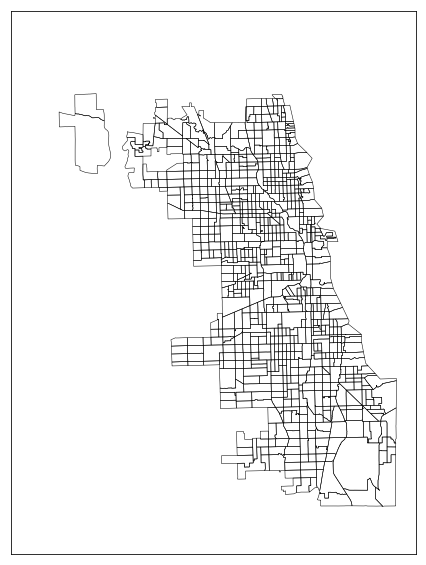

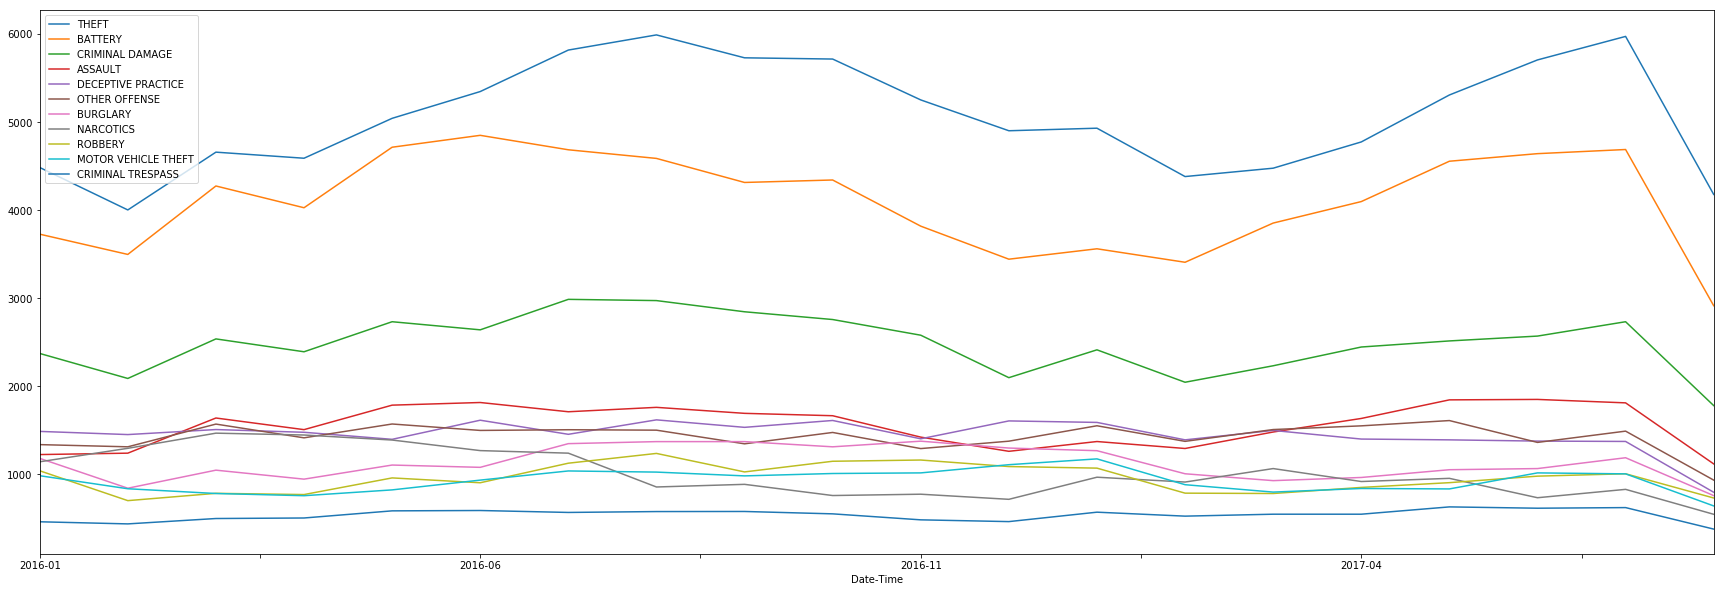

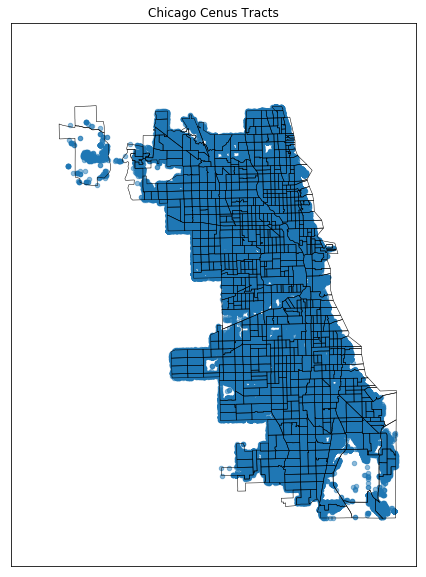

In [6]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons = list(split_data['Longitude'])
lats = list(split_data['Latitude'])
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Cenus Tracts")
plt.show()